# 08. Logistic Regression (로지스틱 회귀분석)
## 분류(Classification)를 위한 회귀분석
https://en.wikipedia.org/wiki/Logistic_regression
<br>In statistics, the **logistic model** (or logit model) is a statistical model that is usually taken to apply to a binary dependent variable. In regression analysis, **logistic regression** or **logit regression** is estimating the parameters of a logistic model. More formally, a logistic model is one where the log-odds of the probability of an event is a linear combination of independent or predictor variables. The two possible dependent variable values are often labelled as "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. The binary logistic regression model can be generalized to more than two levels of the dependent variable: categorical outputs with more than two values are modelled by multinomial logistic regression, and if the multiple categories are ordered, by ordinal logistic regression, for example the proportional odds ordinal logistic model.

https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80
<br>로지스틱 회귀(영어: logistic regression)는 D.R.Cox가 1958년에 제안한 확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다.

로지스틱 회귀의 목적은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하다. 하지만 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

흔히 로지스틱 회귀는 종속변수가 이항형 문제(즉, 유효한 범주의 개수가 두개인 경우)를 지칭할 때 사용된다. 이외에, 두 개 이상의 범주를 가지는 문제가 대상인 경우엔 다항 로지스틱 회귀 (multinomial logistic regression) 또는 분화 로지스틱 회귀 (polytomous logistic regression)라고 하고 복수의 범주이면서 순서가 존재하면 서수 로지스틱 회귀 (ordinal logistic regression) 라고 한다. 로지스틱 회귀 분석은 의료, 통신, 데이터마이닝과 같은 다양한 분야에서 분류 및 예측을 위한 모델로서 폭넓게 사용되고 있다.

## 이항 로지스틱 회귀

https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1

**독립변수**<br>
Self_Study_Daily: how many hours the student studies daily at home, 매일 집에서 공부한 시간<br>
Tution_Monthly: how many hours per month the student is taking private tutor classes, 한달에 받은 개인수업 시간<br>
**종속변수**<br>
Pass_Or_Fail: 0이면 Fail, 1이면 Pass<br>

### 1. Pandas를 이용한 데이터 준비

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Student-Pass-Fail-Data.csv')
df.head()

,Self_Study_Daily,Tuition_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [3]:
df.describe()

,Self_Study_Daily,Tuition_Monthly,Pass_Or_Fail
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [4]:
df.Pass_Or_Fail.value_counts()
#df['Pass_Or_Fail'].value_counts()

Pass_Or_Fail
0    501
1    499
Name: count, dtype: int64

### 2. 데이터 살펴보기
먼저 그래프를 이용해 Self_Study_Daily와 Pass_Or_Fail의 관계를 살펴본다.

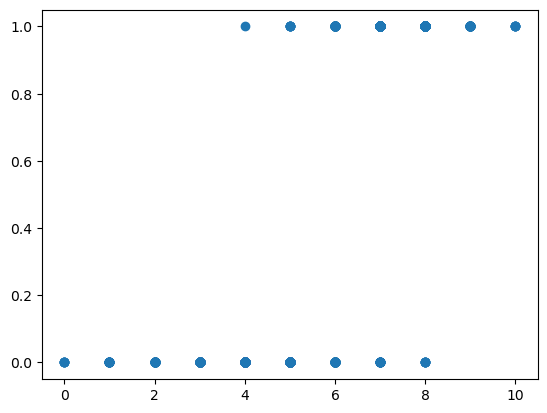

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['Self_Study_Daily'], df['Pass_Or_Fail'])
plt.show()

Pass_Or_Fail이 0과 1의 이산적인 값을 갖기 때문에 그래프가 생각처럼 예쁘게 나오지 않는다.<br>
특히 같은 점이 반복해서 찍히고 있는데, 그 위치에 점이 얼마나 찍혔는지 알 수가 없어서 분포를 파악하기가 매우 어렵다<br>
따라서, 앞에서 배운 KDE plot을 이용해본다.

/Users/sangunpark/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sangunpark/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


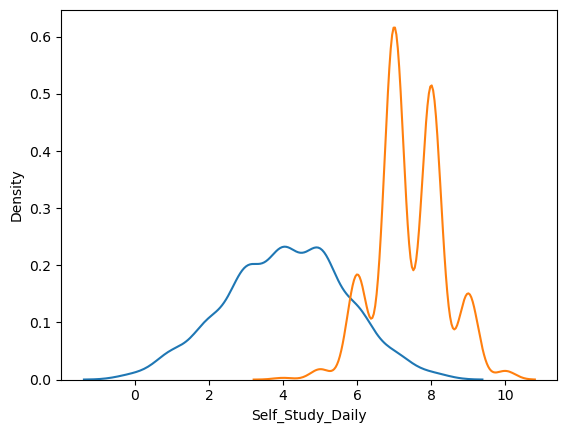

In [6]:
import seaborn as sns
#sns.set_style('whitegrid')
X_Fail = df.Self_Study_Daily[df.Pass_Or_Fail == 0]
X_Pass = df.Self_Study_Daily[df.Pass_Or_Fail == 1]
g = sns.kdeplot(X_Fail)
g = sns.kdeplot(X_Pass)

마찬가지로 Tution_Monthly와 Pass_Or_Fail의 관계를 살펴본다.

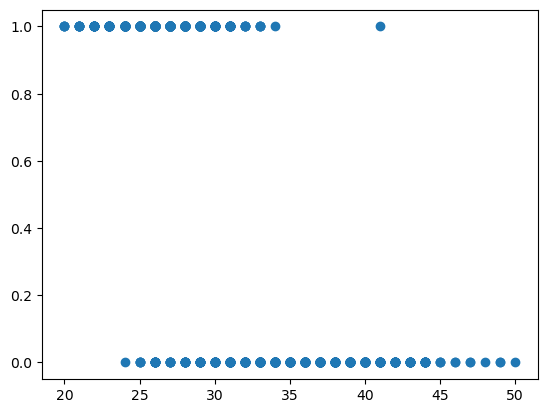

In [7]:
plt.scatter(df['Tuition_Monthly'], df['Pass_Or_Fail'])
plt.show()

/Users/sangunpark/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sangunpark/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


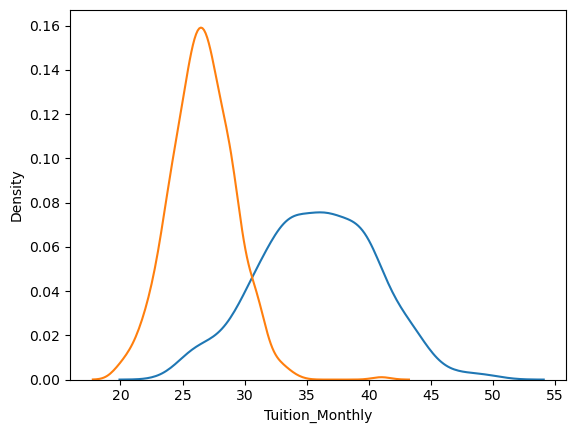

In [8]:
#sns.set_style('whitegrid')
X_Fail = df.Tuition_Monthly[df.Pass_Or_Fail == 0]
X_Success = df.Tuition_Monthly[df.Pass_Or_Fail == 1]
g = sns.kdeplot(X_Fail, legend=False)
g = sns.kdeplot(X_Success, legend=False)

Self_Study_Daily와 Tuition_Monthly가 미치는 영향을 함께 볼 수 있는 방법은 없을까?<br>
위에서 그린 KDE plot의 아이디어를 확장해서 2차원 그래프를 그린다.<br>
즉 어차피 Pass_Or_Fail에 의해 데이터 셋이 둘로 나뉘기 때문에, x축과 y축에 Self_Study_Daily와 Tuition_Monthly를 놓고 scatter 그래프의 모양을 Pass_Or_Fail에 따라 다르게 그리면 이 셋 간의 관계를 한 눈에 보는 것이 가능하다.

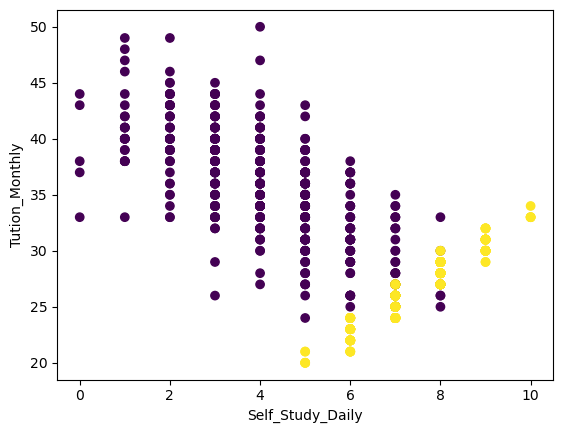

In [9]:
plt.scatter(df.Self_Study_Daily, df.Tuition_Monthly, c=df.Pass_Or_Fail)
plt.xlabel('Self_Study_Daily')
plt.ylabel('Tution_Monthly')
plt.show()

로지스틱 회귀분석은 위와 같은 그래프에서 서로 다른 종류의 점들을 가장 잘 구분하는 직선을 찾는 문제라고 할 수 있다.<br>
위 그림을 보면 사선을 이용해서 적절하게 구분할 수 있을 것 같다는 생각이 든다.

이제 train set과 test set을 준비한다.

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Pass_Or_Fail', axis = 1)
y = df.Pass_Or_Fail

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [11]:
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


### 3. 이항 로지스틱 회귀분석 실시

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Scikit-learn의 LogisticRegression을 이용한다. 사용법은 LinearRegression과 거의 유사하다.

In [12]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)

LogisticRegression()

로지스틱 회귀분석은 성능을 측정하기 위해 선형회귀분석과는 다른 지표를 사용한다.<br>
선형회귀분석은 예측값이 연속적이기 때문에 R2를 사용하지만, 로지스틱 회귀분석은 정확도(Accuracy)를 사용하며 이 값은 예측한 값이 원래값과 일치하는 비율을 의미한다.<br>
지표와 관련된 보다 상세한 설명은 나중 수업에서 추가한다.

In [13]:
LR_clf = LogisticRegression(solver='lbfgs')
LR_clf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.977
Test set score: 0.968


### 4. 이항 로지스틱 회귀분석의 예측 원리 이해
단계 1: 선형회귀분석을 이용해 값을 예측한다. *decision_function*으로 확인 가능<br>
단계 2: 예측된 값을 확률로 변환한다. *predict_proba*으로 확인 가능 <br>
단계 3: 확률에 따라 값을 판별한다. *argmax*으로 확인 가능 <br>

In [14]:
import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅
print('coef_', LR_clf.coef_) 
print('intercept_', LR_clf.intercept_) 

coef_ [[ 2.437 -0.744]]
intercept_ [5.111]


In [15]:
print(LR_clf.decision_function(X_test[:10])) # 예측된 값
print(np.round(LR_clf.predict_proba(X_test[:10]), 3))
print('Calculated Prediction Results:', LR_clf.predict_proba(X_test[:10]).argmax(axis=1)) # 각 행 별로 가장 높은 값을 가지는 index가 예측된 분류
print('Prediction Results:', LR_clf.predict(X_test[:10]))

[  3.776   2.827   3.032 -13.412   3.571   3.571   3.981   4.725 -24.442
   3.032]
[[0.022 0.978]
 [0.056 0.944]
 [0.046 0.954]
 [1.    0.   ]
 [0.027 0.973]
 [0.027 0.973]
 [0.018 0.982]
 [0.009 0.991]
 [1.    0.   ]
 [0.046 0.954]]
Calculated Prediction Results: [1 1 1 0 1 1 1 1 0 1]
Prediction Results: [1 1 1 0 1 1 1 1 0 1]


만일 내가 하루평균 7시간을 공부하고 한달평균 30시간 개인과외를 받으면 붙을 수 있을까?

In [16]:
print(LR_clf.predict(np.asarray([[7, 30]])))

[0]


/Users/sangunpark/miniconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


개인과외를 20으로 줄이면?

In [17]:
print(LR_clf.predict(np.asarray([[7, 20]])))

[1]


/Users/sangunpark/miniconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 다항 로지스틱 회귀
### 1. 데이터 준비 - The Iris Dataset
iris: 붓꽃, setosa, versicolor, virginica 세 종에 대한 데이터가 있음
<br>측정 데이터: 꽃잎(petal)의 폭과 길이, 꽃받침(sepal)의 폭과 길이
<br>목표: 측정 데이터를 이용해 종을 분류하고 예측할 수 있을까?

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR) #boston['DESCR'] 도 가능
print(iris.data.shape, iris.target.shape)
print(iris.data[:5])
print(iris.target[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

클래스: 분류할 대상을 말하며 보통 0부터 시작하는 정수로 표현한다.<br>
이 문제에서는 붓꽃의 세가지 종을 말하며 위 설명을 보면 아래와 같이 iris.target에 표현되어 있는 것을 알 수 있다.<br>
0: Iris-Setosa<br>
1: Iris-Versicolour<br>
2: Iris-Virginica<br>
<br>
따라서 이 문제는 주어진 4개의 독립변수로 0, 1, 2 중 하나의 값을 갖는 종속변수를 예측하는 문제로 볼 수 있다.<br>
주의할 점은 0, 1, 2의 중간 값으로 예측되는 것이 아니라, 셋 중 하나의 값으로만 예측되어야 한다는 것이다.<br>
<br>
이를 위해서 각 종속변수의 값에 대해 세 개의 회귀분석이 실시되고 각각의 값을 가질 확률, 즉 0, 1, 2에 대한 세 개의 확률값을 계산하게 된다. 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### 2. 데이터 살펴보기

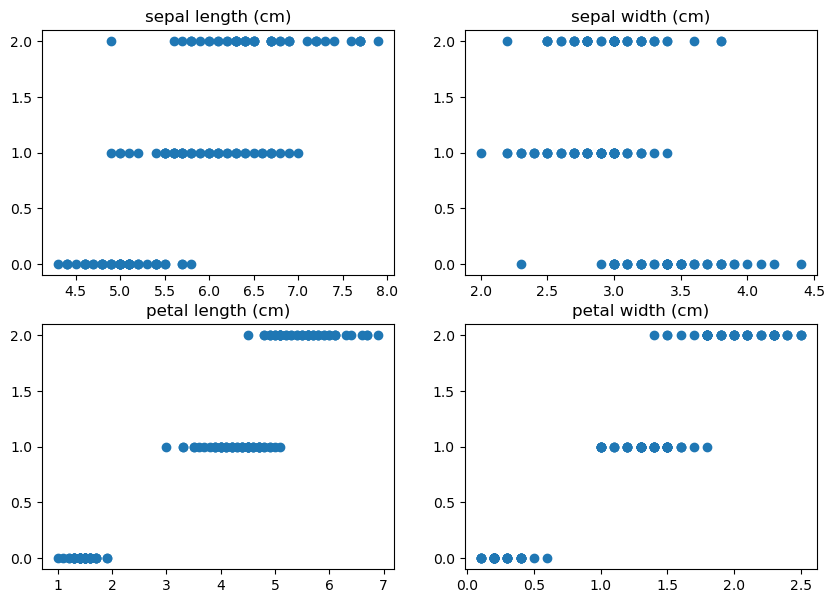

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 7)) #총 네개의 독립변수가 있으므로 2x2 타일을 이용
#y = iris.target
#y = iris.target.astype('str') # target data의 type을 string으로 변환
y = iris.target # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < iris.data.shape[1]:
        x = iris.data[:,i]

        ax.set_title(iris.feature_names[i])
        ax.scatter(x, y)
plt.show()

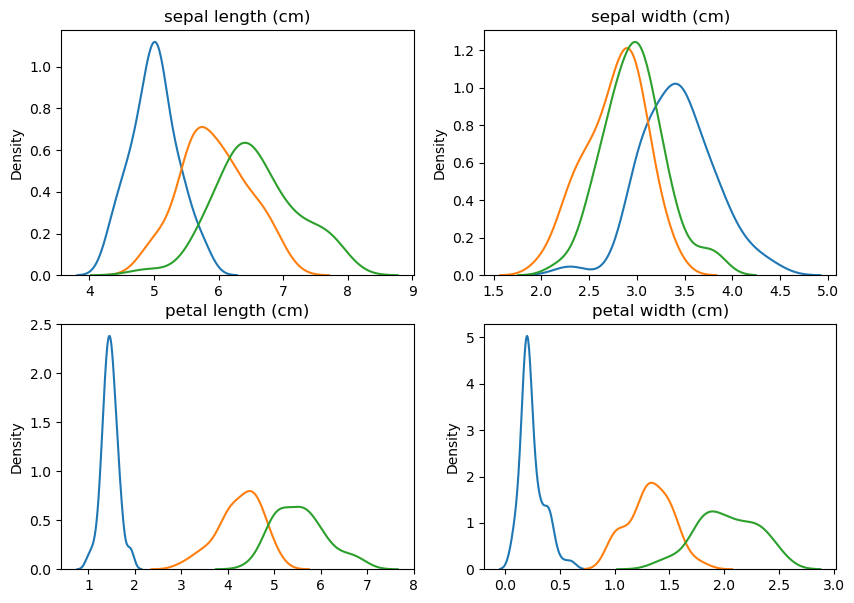

In [21]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(10, 7)) #총 네개의 독립변수가 있으므로 2x2 타일을 이용
#y = iris.target
#y = iris.target.astype('str') # target data의 type을 string으로 변환
y = iris.target # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < iris.data.shape[1]:
        x = iris.data[:,i]

        ax.set_title(iris.feature_names[i])
        sns.kdeplot(x[y == 0], ax=ax)
        sns.kdeplot(x[y == 1], ax=ax)
        sns.kdeplot(x[y == 2], ax=ax)
plt.show()

앞에서 배운 방법을 이용해 꽃받침(sepal)의 폭, 길이와 종의 관계를 함께 보자

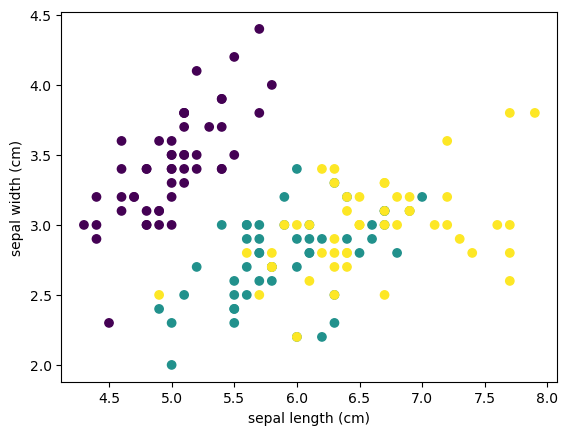

In [22]:
# Plot also the training points
#plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

어느 점이 무슨 종인지 알기 어려우므로 legend를 표시해준다.

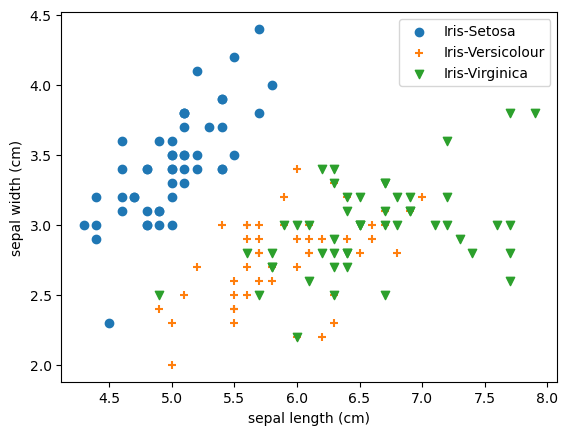

In [23]:
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1], marker='o')
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1], marker='+')
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1], marker='v')

plt.legend(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

꽃잎(petal)의 폭, 길이와 종의 관계는 어떻게 나올까?

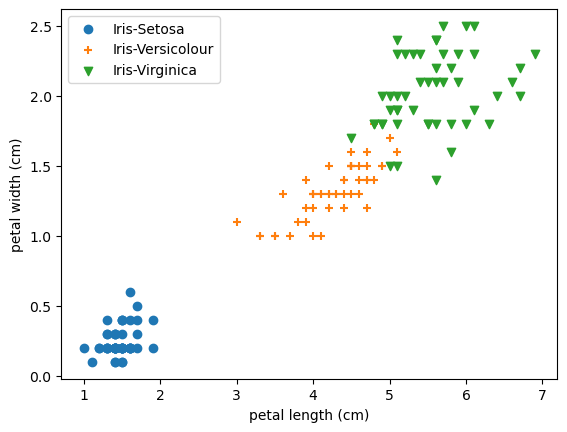

In [24]:
plt.scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], marker='o')
plt.scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], marker='+')
plt.scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], marker='v')

plt.legend(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

## Logistic Regression (Scikit)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 3. 로지스틱 회귀분석 실시

먼저 그래프에서 종의 구분에 가장 큰 영향을 미칠 것으로 예상되는 petal length로 로지스틱회귀분석을 실시

In [25]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
#LR_clf.fit(X_train[:, 2].reshape(-1, 1), y_train)
LR_clf.fit(X_train[:, [2]], y_train)

LogisticRegression()

Warning에 따라 코드를 수정

In [26]:
LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto')
LR_clf.fit(X_train[:, 2].reshape(-1, 1), y_train)

LogisticRegression()

In [27]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train[:, 2].reshape(-1, 1), y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test[:, 2].reshape(-1, 1), y_test)))

Train set score: 0.975
Test set score: 0.867


만일 전체 데이터를 다 사용하면 결과가 좋아질까?

In [28]:
#LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto')
LR_clf.fit(X_train, y_train)

LogisticRegression()

Warning에 따라 iteration 수를 늘림

In [29]:
LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
LR_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.992
Test set score: 0.867


위 결과를 놓고 보면 적어도 test set에서는 petal length 만으로도 전체 features와 동일한 결과를 냄<br>
그러나 train set에 대한 score가 높은 것을 보면 결과를 향상시킬 가능성이 있어 보임

In [31]:
print(LR_clf.predict(X_test[:20])) #예측 결과와 실제 결과 확인
print(y_test[:20])

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0]
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0]


y 값으로는 품종을 알 수 없으므로 종 이름에 대한 리스트(혹은 딕셔너리도 가능)를 만들어 사용

In [32]:
labels = ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']
print([labels[p] for p in LR_clf.predict(X_test[:10])])

['Iris-Virginica', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour']


### 4. 다항 로지스틱 회귀분석 원리에 대한 이해
y의 각 값 0, 1, 2에 대해 각각 회귀분석을 실시하여 확률을 예측하고, 그 확률값이 가장 높은 것을 선택하여 분류를 결정

In [33]:
import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅
print('coef_', LR_clf.coef_) # 0, 1, 2 각각에 대해 네 개의 계수
print('intercept_', LR_clf.intercept_) # 0, 1, 2각각에 대한 상수

coef_ [[-0.435  0.853 -2.307 -0.998]
 [ 0.339 -0.716 -0.097 -0.898]
 [ 0.096 -0.137  2.404  1.896]]
intercept_ [  9.343   3.809 -13.153]


In [34]:
print(LR_clf.decision_function(X_test[:10])) # 0, 1, 2 각각에 대해 예측된 값
print(np.round(LR_clf.predict_proba(X_test[:10]), 3))
print('Prediction Results:', LR_clf.predict_proba(X_test[:10]).argmax(axis=1)) # 각 행 별로 가장 높은 값을 가지는 index가 예측된 분류

[[-4.225  1.555  2.671]
 [-2.324  1.712  0.612]
 [ 6.856  2.606 -9.462]
 [-2.411  1.78   0.631]
 [-2.733  1.721  1.012]
 [ 6.05   3.295 -9.345]
 [-3.814  2.111  1.703]
 [-1.776  2.204 -0.428]
 [ 6.266  2.67  -8.936]
 [-2.589  1.909  0.68 ]]
[[0.001 0.247 0.753]
 [0.013 0.741 0.246]
 [0.986 0.014 0.   ]
 [0.011 0.751 0.238]
 [0.008 0.665 0.327]
 [0.94  0.06  0.   ]
 [0.002 0.6   0.399]
 [0.017 0.917 0.066]
 [0.973 0.027 0.   ]
 [0.009 0.767 0.224]]
Prediction Results: [2 1 0 1 1 0 1 1 0 1]


**predict_proba** 은 확률의 역할을 하므로 각 행의 값을 다 합치면 1이 됨

In [35]:
proba = LR_clf.predict_proba(X_test[:10])
import numpy as np
np.sum(proba, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])